<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER7%20%ED%85%8D%EC%8A%A4%ED%8A%B8%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 들어가며

4장에서 데이터의 속성을 나타내는 두 가지 특성에 대해 다뤘습니다. 정량적인 연속형 특성, 고정된 목록에서 값이 정해지는 범주형 특성입니다. 이번 챕터에서는 많은 애플리케이션에서 사용하는 세 번째 유형의 데이터인 텍스트를 다룹니다. 예컨대 스팸 메일 분류의 경우에는 이메일 내용에 이 분류 작업에 필요한 중요한 정보가 들어 있습니다. 정치인의 의견을 분석하는 경우에는 언행이나 트윗이 중요한 정보를 가집니다. 고객 서비스의 경우에는 고객 메시지에 목적을 구분할 수 있는 정보가 있습니다. 메시지의 제목과 내용을 토대로 의도를 파악해서 해당 부서로 전달하거나 자동 응답으로 전환할 수 있습니다.

텍스트 데이터는 주로 글자가 연결된 문자열로 표현됩니다. 길이가 서로 같은 경우는 거의 없습니다. 현재까지 살폈던 수치형 특성과 매우 상이하므로 전처리는 필수입니다. 내용의 길이가 다르므로 전처리 과정이 없으면 샘플마다 특성 수가 달라집니다.

# **7.1 문자열 데이터 종류**

텍스트는 보통 문자열이지만 모든 문자열 특성을 텍스트로 다루는 것은 아닙니다. 문자열 특성은 범주형 변수로 표현할 수도 있습니다. 문자열 특성을 다루는 방법에 대해 인지하려면 데이터를 직접 살피는 수밖에 없습니다. 문자열 데이터 종류는 아래 4종류입니다.

- **범주형 데이터**: 고정된 목록입니다. 예컨대 사람들에게 가장 좋아하는 색을 묻는 설문의 형태로 데이터를 수집하고자 한다면, 드롭다운(drop-down) 메뉴에서 'red', 'green', 'blue', 'yellow', 'black', 'white', 'puple', 'pink' 중 하나를 선택해야 합니다. 이 경우에 데이터셋에 색상 8개 중에 하나가 들어가고 범주형 변수로 인코딩 됩니다. 값들이 얼마나 자주 나타나는지 히스토그램을 그려볼 수 있습니다. 설문이 절반 정도 진행된 상태에서 설문자가 'black'을 'blacl'이라고 오타를 발견하여 수정했다면, 이 데이터셋에는 같은 의미를 나타내는 두 텍스트가 모두 들어있으므로 하나로 합쳐야 합니다.

- **범주에 의미를 연결할 수 있는 임의의** 문자열: 드롭다운 메뉴 대신 텍스트 필드(test field)를 제공했다고 가정한다면, 설문자 대부분은 대체적으로 사용되는 표현을 사용하지만 몇몇 설문자는 '회색', '쥐색', '암청색'처럼 다른 표현을 사용할 수 있습니다. 이외 저 특이하게 색을 표현할지도 모릅니다. 이렇게 텍스트 필드로 받는 응답을 인코딩하려면 가장 보편적인 값을 선택하거나, 애플리케이션에 적합하도록 모든 응답을 포용할 수 있는 범주를 적절하게 정의해야 합니다. '여러 가지 색'이라는 범주를 만들어서 할당하거나, 인코딩이 불가능한 값은 '그 외'로 할당합니다. 이런 전처리는 수많은 수작업이 필요하고 자동화가 어렵습니다. 가능한 한 범주형 변수로 받는 것이 현명합니다.

- **구조화된 문자열 데이터**: 정의된 범주에 속하진 않지만 직접 입력한 값들이 주소나 장소, 사람 이름, 날짜, 전화번호, 식별번호처럼 일정하게 구조화된 문자열 데이터 형식을 취할 수 있습니다. 이런 종류의 문자열은 분석하기 난해하고, 처리 방법이 문맥과 분야에 따라 매우 다릅니다. 

- **텍스트 데이터**: 자유로운 형태의 절과 문장으로 구성된 형태는 텍스트 데이터입니다. 트위터, 채팅, 리뷰, 소설 작품, 인터넷 문서 등 이런 종류를 통칭합니다. 대부분 단어로 구성된 문장에 정보를 담습니다. 텍스트 분석에서는 데이터셋을 말뭉치(corpus), 텍스트 하나를 의미하는 각 샘플은 문서(document)라고 합니다. 정보 검색(IR, information retrieval)과 자연어 처리(NLP, natural language processing) 공동체에서 유래한 표현들입니다.

# **7.2 예제 애플리케이션: 영화 리뷰 감성 분석**

지금부터 사용한 [데이터셋](http://ai.stanford.edu/~amaas/data/sentiment)의 출처는 스탠퍼드 대학교 연구원인 앤드루 마스가 IMDb라는 웹사이트입니다. 이 데이터셋은 리뷰 텍스트와 '양성' 혹은 '음성'을 나타내는 레이블을 포함합니다. 양성은 긍정적인 반응, 음성은 부정적인 반응입니다. 이런 형식은 데이터를 적절하게 표현한 게 아닐 수 있지만 그대로 사용하기로 합니다.

macOS나 리눅스를 사용한다면 아래 명령어로 데이터를 다운로드하고 압축을 해제합니다. 물론 코랩도 가능합니다.

In [ ]:
# '!' 기호는 실행한다는 의미입니다.
!wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
!tar xzf data/aclImdb_v1.tar.gz --skip-old-files -C data

File ‘data/aclImdb_v1.tar.gz’ already there; not retrieving.



압축을 해제하면 두 폴더에 텍스트 파일이 들어 있습니다. 하나는 훈련 데이터, 다른 하나는 테스트 데이터입니다. 이 두 폴더는 다시 pos와 neg 하위 폴더를 포함합니다.

In [ ]:
# !은 셸(shell) 명령을 실행하는 IPython의 매직 명령어입니다.
# tree 명령이 없다면 find ./data -type d 명령을 사용해서
# 하위 폴더의 목록을 볼 수 있습니다.
!tree -dL 2 data/aclImdb # 이 명령은 유효하지 않습니다.
!find ./data -type d # 유효한 명령입니다.

/bin/bash: tree: command not found
./data
./data/aclImdb
./data/aclImdb/train
./data/aclImdb/train/unsup
./data/aclImdb/train/neg
./data/aclImdb/train/pos
./data/aclImdb/test
./data/aclImdb/test/neg
./data/aclImdb/test/pos


pos 폴더에는 긍정적인 리뷰가 각각 파일 하나로 나뉘어 있고 neg 폴더도 마찬가지입니다. unsup 폴더에는 레이블이 없는 데이터가 있습니다. 이 폴더는 사용하지 않으므로 삭제합니다.

In [ ]:
!rm -r data/aclImdb/train/unsup

하위 폴더가 레이블로 구분된 폴더 구조라면 `load_files` 함수를 사용하여 파일을 읽습니다. 이 함수를 사용하여 폴더를 읽을 때 레이블은 폴더의 알파벳순에 따라 0부터 부여됩니다. 여기서는 neg 폴더의 데이터는 레이블이 0이 되고, pos 폴더의 데이터는 레이블이 1이 됩니다. 먼저 훈련 데이터를 이 함수로 읽습니다. 참고로 지금까지는 데이터셋을 `train_test_split` 함수를 통해 훈련 세트와 테스트 세트로 나눠서 사용했으나 지금 사용할 데이터셋은 이미 두 세트로 나눠져 있습니다.

In [ ]:
from sklearn.datasets import load_files

reviews_train = load_files('data/aclImdb/train/')
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_train, y_train = reviews_train.data, reviews_train.target
print('text_train의 타입:', type(text_train))
print('text_train의 길이:', len(text_train))
print('text_train[6]:\n', text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


결과를 보면 길이는 25,000(리뷰 개수)이며 각 항목은 리뷰 한 개에 대한 문자열입니다. 리뷰는 HTML 줄바꿈 태그(`<br />`)를 포함합니다. 줄바꿈 태그가 머신러닝 모델에 큰 영향을 미치진 않지만 미리 태그를 삭제해서 데이터를 정리하면 좋습니다.

In [ ]:
text_train = [doc.replace(b'<br />', b' ') for doc in text_train]

'text_train'의 항목 타입은 파이썬 버전에 따라 상이합니다. 파이썬 3에서는 문자열 데이터의 바이너리 인코딩인 bytes 타입입니다. 파이썬 2에서는 문자열입니다. 자세히 다루지 않고 넘어갑니다.

이 데이터셋은 양성 클래스와 음성 클래스를 같은 비율로 수집했으므로 양성과 음성 레이블의 수가 동일합니다.

In [ ]:
import numpy as np

print('클래스별 샘플 수 (훈련 데이터):', np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


같은 방식으로 테스트 데이터셋을 읽습니다.

In [ ]:
reviews_test = load_files('data/aclImdb/test/')
text_test, y_test = reviews_test.data, reviews_test.target
print('테스트 데이터의 문서 수:', len(text_test))
print('클래스별 샘플 수 (테스트 데이터):', np.bincount(y_test))
text_test = [doc.replace(b'<br />', b' ') for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


우리는 리뷰가 하나 주어졌을 때 이 리뷰의 텍스트 내용을 보고 양성과 음성을 구분해야 합니다. 전형적인 이진 분류 문제인 것입니다. 그러나 텍스트 데이터는 머신러닝 모델이 다룰 수 있는 형태가 아닙니다. 텍스트의 문자열 표현을 머신러닝 알고리즘에 적용할 수 있게 수치 표현으로 바꿔야 합니다.

# **7.3 텍스트 데이터를 BOW로 표현하기**

머신러닝에서 텍스트를 표현하는 방법 중 **BOW(bag of words)**는 가장 간단하면서 효과적이고 널리 쓰이는 방법입니다. 이 방법을 통해 장, 문단, 문장, 서식과 같은 입력 텍스트의 구조 대부분을 잃고, 각 단어가 이 말뭉치에 있는 텍스트에 얼마나 많이 나타나는지만 헤아립니다. 구조와 상관없이 단어의 출현 횟수만 세므로 텍스트를 담는 가방(bag)으로 여길 수 있습니다. 

전체 말뭉치에 대해 BOW 표현을 계산하려면 다음 세 단계를 거칩니다.

1. 토큰화(tokenization): 각 문서를 문서에 포함된 단어(토큰)로 나눕니다. 예를 들면 공백이나 구두점 등을 기준으로 분리합니다.

1. 어휘 사전 구축: 모든 문서에 나타난 모든 단어의 어휘를 모으고 번호를 매깁니다. 알파벳 순서로 구성됩니다.

1. 인코딩: 어휘 사전의 단어가 문서마다 몇 번이나 나타나는지 헤아립니다.

1단계와 2단계에 관련한 세부 사항은 이 챕터의 뒷부분에서 상세하게 설명합니다. 

BOW 표현을 만드는 방법을 설명하겠습니다.

'This is how you get ants.' 라는 문자열을 처리하는 과정입니다.

1. 토큰화: ['this', 'is', 'how', 'you', 'get', 'ants']

1. 어휘 사전 구축: ['aardvark', 'amsterdam', 'ants', ... 'you', 'your', 'zyxst']

1. 희소 행렬 인코딩: aardvark, ..., ants, ..., get, ..., you, ..., zyxst [0, ..., 0, 1, 0, ...., 0, 1, 0, ..., 0, 1, 0, ..., 0]

출력은 각 문서에서 나타난 단어의 횟수가 담긴 벡터 하나입니다. 이를 위해 사전에 있는 각 단어가 문서마다 얼마나 자주 나타나는지 세야 합니다. 이 수치 표현은 전체 데이터셋에서 고유한 각 단어를 특성으로 가집니다. 원본 문자열에 있는 단어순은 BOW 특성 표현에서는 완전하게 무시됩니다.

## **7.3.1 샘플 데이터에 BOW 적용하기**

BOW 표현은 `CountVecterizer` 클래스에 변환기 인터페이스로 구현되어 있습니다. 두 샘플만 포함한 데이터셋에 적용해서 작동하는 방식을 확인합니다.

In [ ]:
bards_words = ['The fool doth think he is wise,',
               'but the wise man knows himself to be a fool']

`CountVectorizer` 클래스를 임포트 해서 객체를 만들고, 샘플 데이터에 `fit` 메서드를 적용합니다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

`CountVectorizer` 클래스의 `fit` 메서드는 훈련 데이터를 토큰으로 나누고 어휘 사전을 구축하여 `vocabulary_` 속성에 저장합니다.

In [ ]:
print('어휘 사전의 크기:', len(vect.vocabulary_))
print('어휘 사전의 내용:\n', vect.vocabulary_)

어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


훈련 데이터에 대해 BOW 표현을 만들기 위해 `transform` 메서드를 호출합니다.

In [ ]:
bag_of_words = vect.transform(bards_words)
print('BOW:', repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


BOW 표현은 0이 아닌 값만 저장하는 사이파이 희소 행렬로 저장됩니다. 행렬의 크기는 $2 \times 13$이며, 각 행은 샘플 하나를 나타내고, 각 특성은 어휘 사전에 있는 단어입니다. 문서 대부분은 어휘 사전에 있는 단어 중에 일부만 포함합니다(특성 배열 대부분의 원소가 0이라서 희소 행렬을 사용합니다). 전체 영어 단어 수에 비하여 영화 리뷰에 얼마나 많은 단어가 나타날지(어휘 사전이 어떻게 구성될지) 생각해보면 이해하기 쉽습니다.

값이 0인 원소를 모두 저장하면 메모리를 낭비하는 것입니다. 희소 행렬의 실제 내용을 살피려면 `toarray` 메서드를 사용해서 0인 원소도 모두 저장되는 밀집된 넘파이 배열로 바꿔야 합니다. 다만 이 데이터셋은 단어 13개만 가졌으므로 배열 변형이 가능하지만 실제로 거대한 데이터셋에 적용한다면 MemorryError가 발생할 가능성이 있습니다.

In [ ]:
print('BOW의 밀집 표현:\n', bag_of_words.toarray())

BOW의 밀집 표현:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


각 단어의 출현 횟수는 0 또는 1입니다. 'bards_words'에 있는 두 문자열 모두 같은 단어를 두 개 이상 가지지 않습니다.

이 특성 벡터를 읽는 법을 설명합니다. 첫 번째 문자열('The fool doth think he is wise,')은 첫 번째 행으로 나타납니다. 어휘 사전의 첫 번째 단어인 'be'와 두 번째 단어인 'but'은 0번만큼 나옵니다. 세 번째 단어인 'doth'는 1번만큼 나옵니다. 두 행을 보면 네 번째 단어인 'fool'과 열 번째 단어인 'the', 열 세번째 단어인 'wise'는 두 문자열에 모두 포함됩니다.

## **7.3.2 영화 리뷰에 대한 BOW**

이제 실제 데이터셋을 이용하여 BOW를 설명합니다. 앞에서 IMDb 리뷰의 훈련 데이터와 테스트 데이터를 읽어서 작업할 문자열 리스트인 'text_train'과 'text_test'로 바꿨습니다.

In [ ]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print('X_train:\n', repr(X_train))

X_train:
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


훈련 데이터의 BOW 표현인 'X_train'의 크기는 $25,000 \times 74,849$입니다. 어휘 사전은 단어를 74,849개만큼 가졌습니다. 데이터는 사이파이 희소 행렬 형태로 저장되어 있습니다.

어휘 사전을 더 살펴봅니다. `CountVectorizer` 클래스의 객체가 가진 `get_feature_name` 메서드는 각 특성에 해당하는 단어를 리스트로 반환합니다.

In [ ]:
feature_names = vect.get_feature_names()
print('특성(단어) 개수:', len(feature_names))
print()
print('처음 20개 특성:\n', feature_names[:20])
print()
print('20010~20030까지 특성:\n', feature_names[20010:20030])
print()
print('매 2000번째 특성:\n', feature_names[::2000])

특성(단어) 개수: 74849

처음 20개 특성:
 ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']

20010~20030까지 특성:
 ['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']

매 2000번째 특성:
 ['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


어휘 사전의 처음 20개 중에 15개는 숫자입니다. 이 숫자들은 모두 리뷰 어딘가에 나타났으므로 단어로 추출됐습니다. 영화 리뷰라는 걸 고려하면 (제임스 본드 역할을 의미하는 '007'을 제외하면) 숫자는 별다른 의미를 가지지 않습니다. 의미 없는 단어 중에서 의미 있는 단어를 선별하는 일은 결코 쉬운 일이 아닙니다.

'dra'로 시작하는 영어 단어 목록을 살펴보면, 'draught', 'drawback', 'drawer' 모두 단수와 복수형이 서로 다른 단어로 어휘 사전에 포함되어 있습니다. 이런 류의 단어들은 의미가 매우 비슷하므로 다른 특성으로 간주해서 개별적으로 기록하는 것은 옳지 않습니다.

예시한 '007'을 살펴봅니다. 어휘 사전에서 10번째에 위치한 단어입니다. 이 위치에 대한 값이 1인 행을 찾아서 훈련 데이터를 확인합니다.

In [ ]:
[text_train[i] for i in np.argwhere(X_train[:, 9] == 1)[:, 0]]

[b'"Dutch Schultz", AKA Arthur Fleggenheimer, was a real person and his rather nasty life is fairly well documented. This movie which purports to depict his life should have used a fictional character, because the overdramatized events are too strong a departure from the facts and the chronology. Not only that, it ignores some interesting details which other versions have included such as the public relations fiasco in upstate N.Y. and his religious conversion. It is true that he was executed by Luciano, Lansky, et. al. but that\'s as far as it goes. The exploding plate scene which represents Luciano carrying out the execution of Bo Weinberg in his own home, assisted by his own mother is rediculous. Also, there is the scene in which Dutch approaches his own mother to pay protection to Legs Diamond. It just doesn\'t work. The character of Mrs. Fleggenheimer doesn\'t work either. This movie does not need a doting Jewish mother for comic relief. The lame representation of Legs Diamond was

특성 추출 방법을 개선하기 전에 분류기를 만들어서 성능 수치를 확인합니다. 'y_train'에 있는 훈련 레이블과 'X_train'에 있는 훈련 데이터의 BOW 표현으로 분류기를 학습합니다. 이런 희소 행렬의 고차원 데이터셋에서는 `LogisticRegression` 같은 선형 모델의 성능이 매우 뛰어납니다.

교차 검증을 사용해서 `LogisticRegression` 모델의 성능을 평가합니다.

In [ ]:
# 다소 오래 걸리는 작업입니다.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)
print('교차 검증 평균 점수: {:.2f}'.format(np.mean(scores)))

교차 검증 평균 점수: 0.88


교차 검증 평균 점수 88%는 균형 잡힌 데이터셋에서 꽤 좋은 이진 분류 성능입니다.

서적에서 서술하기를 위 코드는 전처리와 교차 검증을 설명한 6장의 규칙을 어기고 있습니다. `CountVectorizer` 클래스의 기본 설정에서는 실제로 어떤 통계도 수집하지 않기 때문에 결과에 어떠한 영향도 주지 않습니다. 처음부터 `Pipeline`을 사용하면 더 좋지만 쉽게 설명하기 위해 뒤로 미뤘습니다. `CountVectorizer` 클래스의 `min_df`, `max_df` 같은 매개변수의 기본값을 조정하면 교차 검증 결과에 영향을 줍니다. `Pipeline`을 사용하는 편이 더 낫습니다.

`LogisticRegression` 클래스에는 규제 매개변수 `C`가 있습니다. 그리드 서치를 사용해서 조정을 시도합니다.

In [ ]:
# 매우 오래 걸리는 작업입니다.
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))
print('최적 매개변수: ', grid.best_params_)

최상의 교차 검증 점수: 0.89
최적 매개변수:  {'C': 0.1}


이 매개변수를 사용해서 테스트 세트의 일반화 성능을 측정합니다.

In [ ]:
X_test = vect.transform(text_test)
print('테스트 점수: {:.2f}'.format(grid.score(X_test, y_test)))

테스트 점수: 0.88


이제 단어 추출 방법을 개선합니다. `CountVectorizer` 클래스는 정규표현식을 사용해서 토큰을 추출합니다. 기본적으로 사용하는 정규 표현식은 '\b\w\w+\b'입니다(정확하게는 '(?u)\b\w\w+\b'입니다. 파이썬3에서 '(?u)'는 불필요한 패턴이지만 하위 호환성을 위해 남겼습니다). 이 식으로 경계(\b)가 구분되고, 적어도 둘 이상의 문자나 숫자(\w)가 연속된 단어를 찾는 것입니다. 한 글자로 된 단어는 찾지 않고, 'doesn't' 같은 축약형이나 'bit.ly' 같은 단어는 분리되고, 'h8ter'는 한 단어로 매칭됩니다. `CountVectorizer` 클래스는 모든 단어를 소문자로 바꾸므로 'soon', 'Soon', 'SOon'은 모두 같은 특성(토큰)이 됩니다.

이런 간단한 메커니즘은 실제로는 잘 작동하지만 숫자처럼 의미 없는 특성을 생성합니다. 이런 특성을 최대한 생성하지 않도록 하는 방법은 적어도 문서 두 개(또는 다섯 개 등)에 나타난 토큰만을 사용하는 것입니다. 문서 하나에서만 나타난 토큰은 테스트 세트에 나타날 가능성이 적으므로 큰 도움이 되지 않습니다.

`min_df` 매개변수에 토큰이 나타날 최소 문서 개수를 지정할 수 있습니다.

In [ ]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('min_df를 지정하여 제한한 X_train:', repr(X_train))

min_df를 지정하여 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


적어도 토큰이 다섯 번 이상 나타나야 하므로 특성 수가 1/3 정도인 27,271개로 감소했습니다.

토큰 내용을 다시 살핍니다.

In [ ]:
feature_names = vect.get_feature_names()
print('처음 특성 50개:\n', feature_names[:50])
print()
print('20,010~20,030까지 특성:\n', feature_names[20010:20030])
print()
print('매 700번째 특성:\n', feature_names[::700])

처음 특성 50개:
 ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']

20,010~20,030까지 특성:
 ['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']

매 700번째 특성:
 ['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recipient',

숫자 길이가 줄고 희귀한 단어와 철자가 틀린 단어들이 제거됐습니다.

그리드 서치를 통해 모델 성능을 확인합니다.

In [ ]:
# 매우 오래 걸리는 작업입니다.
# 이하 그리드서치 관련한 모든 셀은 계산 시간이 오래 소요됩니다.
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최적의 교차 검증 점수: {:.2f}'.format(grid.best_score_))

최적의 교차 검증 점수: 0.89


교차 검증 점수는 변하지 않았습니다. 다만 불필요한 특성의 개수가 줄면서 처리 속도가 빨라지고 모델을 이해하기 쉬워졌습니다.

참고로 훈련 데이터에 없던 단어(이하 '해당 단어')가 포함된 문서에 `CountVectorizer` 클래스의 `transform` 메서드를 적용하면 어휘 사전에 해당 단어가 없으므로 해당 단어를 무시합니다. 훈련 데이터에 없는 단어에 대해 학습하는 것은 불가능한 일입니다. 보통 분류 작업에서 문제가 되지는 않지만 스팸 감지와 같은 애플리케이션에서는 어휘 사전에 없는 단어가 문서에 얼마나 많이 나타나는지 기록한 특성은 유용하기도 합니다. 사이킷런에는 없는 기능이지만 직접 작성하기에 어렵지는 않습니다. 적절한 방식을 사용해서 어휘를 제한하지 않으면 훈련하는 동안 어휘 사전에 없는 단어는 생기지 않습니다.

# **7.4 불용어**

의미 없는 단어를 제거하는 두 가지 다른 방법이 있습니다. 빈번하게 사용하지만 유용하지 않은 단어를 제외하는 것입니다. 언어별 불용어(stopword) 목록을 사용하는 방법, 자주 나타나는 단어를 제외하는 방법입니다.

참고로 영어의 불용어는 예시를 위한 것입니다. 다른 언어의 불용어를 사용하려면 `CountVectorizer` 클래스의 `stop_words` 매개변수에 사용하려면 불용어 목록을 입력합니다. 

`feature_extraction.text` 모듈에 영어의 불용어를 가지고 있습니다. 불용어 목록의 순서에 따라 출력 결과가 본서와 다를 수 있습니다.

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print('불용어 개수:', len(ENGLISH_STOP_WORDS))
print('매 10번째 불용어:\n', list(ENGLISH_STOP_WORDS)[::10])

불용어 개수: 318
매 10번째 불용어:
 ['from', 'enough', 'still', 'but', 'into', 'next', 'own', 'keep', 'where', 'fire', 'you', 'what', 'itself', 'without', 'nevertheless', 'might', 'same', 'or', 'yet', 'twenty', 'any', 'bottom', 'before', 'seems', 'whereupon', 'amongst', 'whereas', 'had', 'themselves', 'couldnt', 'will', 'nor']


불용어를 어휘 사전에서 제외하면 특성 개수가 줄어들겠지만 성능 향상을 도모할 수도 있습니다.

In [ ]:
# `stop_words='english'`로 지정하면 내장된 불용어를 사용합니다.
# 내장된 불용어에 추가하거나 별개의 목록을 사용할 수 있습니다.
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
print('불용어가 제거된 X_train:\n', repr(X_train))

불용어가 제거된 X_train:
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


그리드 서치를 적용합니다.

In [ ]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))

최상의 교차 검증 점수: 0.88


성능이 약간 감소한 정도입니다. 특성 305개를 제외했지만 성능이 향상된 것 같지는 않습니다. 불용어 목록을 사용하는 것은 도움이 되지 않습니다. 고정된 불용어 목록은 모델이 데이터셋만 보고 불용어를 골라내기 어려운 작은 데이터셋에서나 유효합니다.

다른 방식으로는 `CountVectorizer` 클래스의 `max_df` 매개변수를 지정해서 자주 나타나는 단어를 제거하고 특성 개수와 성능에 영향을 주는 것입니다.

# **7.5 tf-idf로 데이터 스케일 변경하기**

중요하지 않아 보이는 특성을 제외하는 대신 얼마나 의미가 있는 특성인지를 계산해서 스케일을 조정하는 방식이 있습ㅂ니다. 가장 널리 알려진 방식은 **tf-idf(term frequency-inverse document frequency, 단어빈도-역문서빈도)**으로, 말뭉치의 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법입니다. 한 단어가 특정 문서에 자주 나타나고 다른 여러 문서에서는 그렇지 않다면, 그 문서의 내용을 아주 잘 설명하는 단어라고 여길 수 있습니다.

tf-idf를 구현한 클래스 2개를 설명합니다. tf-idf 스케일 변환 방식은 아래 클래스들 외에 또다른 변종이 많습니다. [위키백과](https://en.wikipedia.org/wiki/Tf-idf)를 참고하시기 바랍니다. 

- `TfidfTransformer`: `CountVectorizer`가 만든 희소 행렬을 입력받아 변환합니다.

- `TfidfVectorizer`: 텍스트 데이터를 입력받아서 BOW 특성 추출과 tf-idf 변환을 수행합니다. `CountVectorizer` 클래스의 서브 클래스로, `CountVectorizer` 클래스를 이용해서 BOW를 만들고 `TfidfTransformer` 클래스를 사용해서 tf-idf 변환을 합니다.

문서 d에 있는 단어 w에 대한 tf-idf 점수는 `TfidfTransformer` 클래스와 `TfidfVectorizer` 클래스에 아래 공식으로 정의되어 있습니다. 굳이 암기할 필요는 없는 공식입니다.

$tfidf(w, d) = tf(log(\frac{N+1}{N_w+1})+1)$

$N$은 훈련 세트에 있는 문서의 개수입니다.   
$N_w$는 단어 $w$가 나타난 훈련 세트 문서의 개수입니다.   
$tf$(단어 빈도수)는 단어 $w$가 대상 문서 $d$(변환 또는 인코딩 하려는 문서)에 나타난 횟수입니다.

위의 두 파이썬 클래스 모두 tf-idf 계산을 선행한 뒤에 L2 정규화(L2 normalization)를 적용합니다. 다시 말하면 유클리디안 노름(euclidean norm)이 1이 되도록 각 문서 벡터의 스케일을 바꿉니다. 이렇게 스케일이 바뀐 벡터는 문서 길이(단어 수)에 영향을 받지 않습니다. 참고로 벡터의 원소를 유클리디안 노름(L2 노름)으로 나누면 L2 노름이 1인 단위 벡터가 됩니다. `TfidfVectorizer` 클래스와 `TfidfTransformer` 클래스의 `norm` 매개변수의 기본값은 `l2`이며 L2 정규화를 의미합니다.

tf-idf는 실제로 훈련 데이터의 통계적 속성을 사용하므로 파이프라인을 사용해서 그리드 서치를 적용할 수 있습니다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print('최상의 교차 검증 검수: {:.2f}'.format(grid.best_score_))

최상의 교차 검증 검수: 0.89


tf-idf가 성능 향상에 별다른 영향을 주지 못했습니다.

tf-idf는 어떤 단어가 가장 중요한지도 알려줍니다. tf-idf는 문서를 구별하는 단어를 찾는 방법이지만 완전한 비지도 학습입니다. 따라서 '긍정적인 리뷰'와 '부정적인 리뷰' 레이블과 꼭 관계가 있지 않습니다.

파이프라인에서 `TfidfVectorizer` 단계를 선택합니다.

In [ ]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
# 훈련 데이터셋을 변환합니다.
X_train = vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾습니다.
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 특성 이름을 구합니다.
feature_names = np.array(vectorizer.get_feature_names())

print('가장 낮은 tfidf를 가진 특성:\n', feature_names[sorted_by_tfidf[:20]])
print('가장 높은 tfidf를 가진 특성:\n', feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성:
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


tf-idf가 낮은 특성은 전체 문서에 걸쳐 매우 많이 나타나거나 조금씩 사용되거나 매우 긴 문서에서만 사용됩니다. 전체 문서에 걸쳐서 많이 나타나면 idf 값이 1에 가까워지고, 조금씩 사용되거나 매우 긴 문서에서만 사용되면 L2 정규화 때문에 tf-idf 값은 작아집니다.

tf-idf가 높은 특성은 쇼나 영화를 나타내는 경우가 많습니다. 이런 단어들은 특정한 쇼나 드라마에 대한 리뷰에서만 나타나지만, 특정 리뷰에서 매우 자주 나타나는 경향이 있습니다. 'pokemon', 'smallville', 'doodlebops'를 예로 들 수 있으며, 'scanners'는 영화 제목입니다. 이 단어들이 감성 분석에 도움이 되진 않겠지만 리뷰에 관련된 구체적인 정보를 많이 갖고 있습니다.

idf 값이 낮은 단어(자주 나타나서 덜 중요하다고 여겨지는 단어)를 확인합니다. 훈련 세트의 idf 값은 `idf_` 속성에 저장됩니다.

In [ ]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print('가장 낮은 idf를 가진 특성:\n', feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성:
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


대부분 'the', 'no' 같은 불용어입니다. 그러나 일부는 'movie', 'film', 'time', 'story'처럼 영화 리뷰에서만 볼 수 있는 단어입니다. 'good', 'great', 'bad'도 자주 나타나는 단어라서 감성 분석에는 매우 중요하지만, tf-idf로 봤을 땐 덜 중요합니다.

# **7.6 모델 계수 조사**

로지스틱 회귀 모델이 실제로 무엇을 학습했는지 확인하겠습니다. 자주 나타나지 않은 단어를 제외해도 특성이 많기 때문에 모든 계수를 확인하기는 쉽지 않습니다. 가장 큰 값의 계수와 해당 단어를 확인하겠습니다. tf-idf 특성으로 훈련시킨 마지막 모델을 사용합니다.

In [ ]:
pip install mglearn

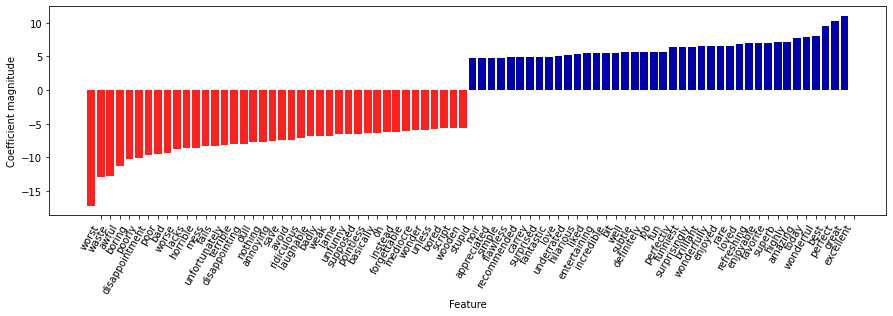

In [ ]:
import mglearn

mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps['logisticregression'].coef_[0],
    feature_names, n_top_features=40)

tf-idf 특성으로 훈련시킨 로지스틱 회귀의 최댓값과 최솟값 계수를 나타내는 그래프입니다. 막대의 크기는 계수 크기입니다. 로지스틱 회귀의 가장 큰 계수 40개, 가장 작은 계수 40개를 나타낸 것입니다. 왼쪽의 음수 계수는 모델에서 부정적인 리뷰의 단어입니다. 오른쪽 양수 계수는 긍정적인 리뷰의 단어입니다. 참고로 'bit', 'job', 'today' 같은 단어는 'good job'이나 'best today' 처럼 긍정적인 구절의 일부로 추측됩니다.

# **7.7 여러 단어로 만든 BOW(n-그램)**

BOW 표현 방식은 단어의 순서가 완전하게 무시된다는 큰 단점을 가집니다. 의미가 완전히 반대인 두 문자열이 동일하게 변환되는 것입니다. 예컨대 "it's bad, not good at all."과 "it's good, not bad at all."에서 'not'은 문맥의 중요성을 잘 나타내는 단어입니다. 순서가 무시되면서 문맥의 의미를 잃게 됩니다.

물론 BOW 표현 방식을 사용할 떄 문맥을 고려하는 방법이 존재합니다. 토큰 하나의 횟수만 고려하지 않고 옆에 있는 두세 개의 토큰을 함께 고려하는 방법입니다. 토큰 하나는 **유니그램(unigram)**, 토큰 두 개를 **바이그램(bigram)**, 세 개를 **트라이그램(trigram)**이라고 합니다. 연속된 토큰은 **n-그램(n-gram)**이라고 부릅니다.

`CountVectorizer` 클래스와 `TfidfVectorizer` 클래스는 `ngram_range` 매개변수에 특성으로 고려할 토큰의 범위를 지정할 수 있습니다. 입력값은 튜플이며, 연속된 토큰의 최소 길이와 최대 길이입니다.

앞에서 사용한 샘플 데이터를 출력합니다.

In [ ]:
print('bards_words:\n', bards_words)

bards_words:
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


기본값은 최소 길이가 1이고 최대 길이가 1인 토큰마다 특성 하나를 생성합니다. 정확하게 토큰 하나입니다.

In [ ]:
# 최대 길이가 3이면 (1, 3)으로 지정합니다.
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print('어휘 사전 크기:', len(cv.vocabulary_))
print('어휘 사전:\n', cv.get_feature_names())

어휘 사전 크기: 13
어휘 사전:
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


토큰 두 개가 연속된 바이그램을 만들려면 `ngram_range=(2, 2)`로 지정합니다.

In [ ]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print('어휘 사전 크기:', len(cv.vocabulary_))
print('어휘 사전:\n', cv.get_feature_names())

어휘 사전 크기: 14
어휘 사전:
 ['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


연속된 토큰의 수가 커지면 특성이 더 구체적이고 많이 만들어집니다. 'bards_words'에 있는 두 문장 사이에는 공통된 바이그램이 없습니다.

In [ ]:
print('변환된 데이터 (밀집 배열):\n', cv.transform(bards_words).toarray())

변환된 데이터 (밀집 배열):
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


단어 하나가 큰 의미를 단어 하나가 큰 의미를 가진 경우가 많으므로 대부분의 애플리케이션에서 토큰의 최소 길이는 1입니다. 많은 경우에 바이그램을 추가하면 도움이 됩니다. 5-그램까지는 특성 개수가 매우 많아지게 되고, 구체적인 특성도 많아지므로 과대적합이 될 가능성을 배제할 수 없습니다. 이론상 바이그램의 수는 유니그램 수의 제곱입니다. 트라이그램의 수는 유니그램의 세제곱이 되므로 특성 수는 상당히 커집니다. 언어(영어)의 구조를 보면 실제로 데이터에 나타나는 높은 n-그램의 횟수가 많기는 하지만 이보다는 훨씬 적습니다.

참고로 단어 d개로 구성된 문장에서 최대 n-그램의 수는 중복 순열의 수이므로 d^2이 됩니다. 두 개의 단어 @과 %로 구성된 문장을 가정한다면 '@%%%@@@%@%' 바이그램의 수는 4이고 트라이그램의 수는 8입니다.

'bards_words'에 유니그램, 바이그램, 트라이그램을 적용한 예를 살핍니다.

In [ ]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print('어휘 사전 크기:', len(cv.vocabulary_))
print('어휘 사전:\n', cv.get_feature_names())

어휘 사전 크기: 39
어휘 사전:
 ['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


IMDb 영화 리뷰 데이터에 `TfidfVectorizer` 클래스를 적용하고 그리드 서치로 최적의 n-그램 범위를 찾습니다.

In [ ]:
# 다수의 매개변수 조합과 트라이그램 때문에 실행 시간이 오래 걸립니다.
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'tfidfvectorizer__ngram_range':[(1, 1), (1, 2), (1, 3)]}
grid =GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print ('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))
print('최적 매개변수:\n', grid.best_params_)

최상의 교차 검증 점수: 0.91
최적 매개변수:
 {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


바이그램과 트라이그램을 추가해서 1% 이상 성능을 제고했습니다.

매개변수에 대한 교차 검증 정확도를 히트맵으로 나타냅니다.

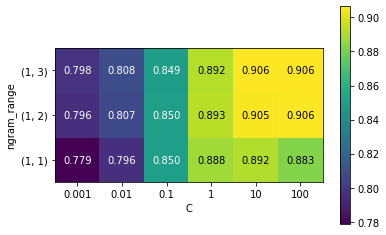

In [ ]:
# 그리드 서치에서 테스트 점수를 추출합니다.
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 히트맵을 그립니다.
import matplotlib.pyplot as plt

heatmap = mglearn.tools.heatmap(
    scores, xlabel='C', ylabel='ngram_range', cmap='viridis', fmt='%.3f',
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)
plt.show()

히트맵을 보면 바이그램이 성능을 크게 높여주고, 트라이그램은 정확도 측면에서 성능이 약간 향상된 정도입니다.

모델이 어떻게 향상됐는지 더 잘 이해할 수 있도록 유니그램, 바이그램, 트라이그램을 포함해 최적 모델의 중요 계수를 그래프로 나타냅니다.

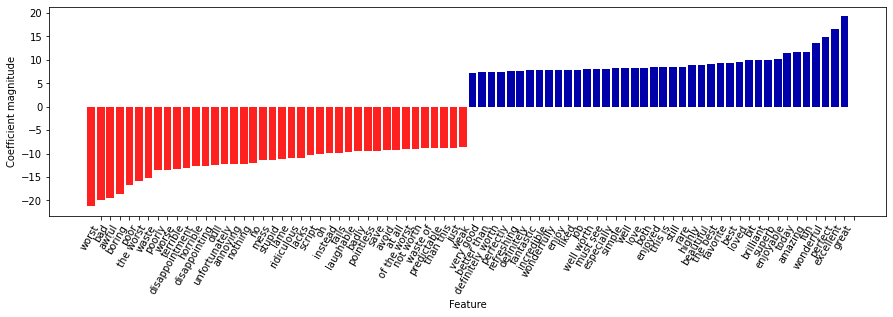

In [ ]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)

tf-idf와 유니그램, 바이그램, 트라이그램을 사용한 모델에서 가장 중요한 특성을 나타냈습니다. 유니그램 모델에서는 없던 단어인 'worth'가 들어간 특성이 있습니다. 'not worth'는 부정적인 리뷰를 의미하지만 'definately worth'와 'well worth'는 긍정적인 리뷰를 의미합니다. 문맥이 'worth' 단어의 의미에 영향을 주는 예입니다.

특성들이 도움이 된 이유를 알아보고자 트라이그램만 그래프로 나타냅니다. 영향력이 큰 바이그램과 트라이그램 대부분은 독립적일 때는 큰 의미가 없는 단어로 구성됩니다. 예컨대 'none of the', 'the only good', 'on and on', 'this is one', 'of the most' 등입니다. 그러나 아래 그래프에서 확인할 수 있듯이 이런 특성으로 인한 영향은 유니그램의 중요도와 비교하면 상당히 제한적입니다.

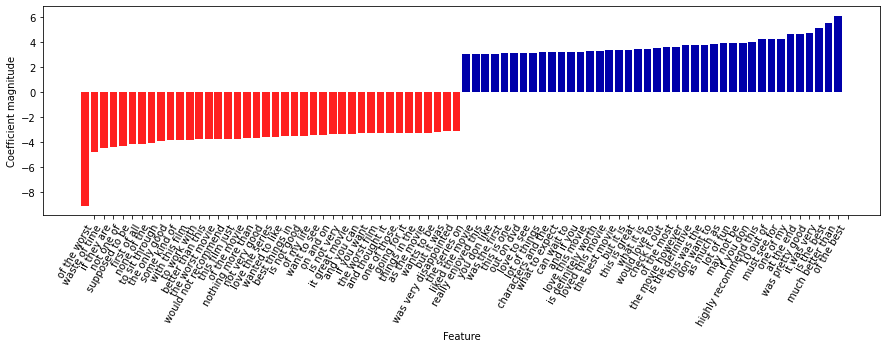

In [ ]:
# 트라이그램의 특성을 찾습니다.
mask = np.array([len(feature.split(' ')) for feature in feature_names]) == 3
# 트라이그램의 특성만 그래프로 나타냅니다.
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)

# **7.8 고급 토큰화, 어간 추출, 표제어 추출**

`CountVectorizer` 클래스와 `TfidfVectorizer` 클래스의 특성 추출은 비교적 단순합니다. 이보다 훨씬 더 정교한 방법을 소개합니다. 전문적인 텍스트 처리 애플리케이션의 뛰어난 점은 BOW 모델의 첫 번째 단계인 토큰화입니다. 이 단계는 특성 추출을 위해 단어가 무엇으로 구성되었는지 정의합니다.

위에서 어휘 사전에 단수 단어와 복수 단어가 함께 포함되었던 예시가 있었습니다. 예컨대 'drawback'과 'drawbacks', 'drawer'과 'drawers' 등입니다. BOW 모델에서 이 단어들은 의미가 매우 가까우므로, 이를 구분하면 과대적합 될 수 있고, 모델이 훈련 데이터를 제대로 활용하지 못합니다.

유사하게 'replace', 'replaced', 'replacement', 'replaces', 'replacing' 같은 단어는 다른 동사 형태이거나 'to replace' 동사와 관련된 명사입니다. 명사에 단수, 복수가 있는 것처럼 여러 동사형과 관련 단어들을 다른 토큰으로 다루면 모델을 일반화하는 데 도움이 되지 않습니다.

이 문제를 해결하려면 각 단어를 그 단어의 어간으로 표현해서 같은 어간을 가진 모든 단어를 구분하거나 합쳐야 합니다. 일일이 어미를 찾아 제외하는 규칙 기반 방식을 **어간 추출(stemming)**이라고 합니다. 대신 알려진 단어의 형태 사전(명시적이고 사람이 구축한 시스템)을 사용하고 문장에서 단어 역할을 고려하는 처리 방식을 **표제어 추출(lemmatization)(=형태소 분석)**이라고 하며 단어의 표준 형태는 표제어라고 합니다. 두 처리 방식은 단어의 일반 형태를 추출하는 **정규화(normalization, 단어 정규화(word normalization)**의 일종입니다. 정규화의 또 다른 사례는 맞춤법 교정이지만 본서에서는 다루지 않습니다.

참고로 어간은 활용엉가 활용할 때 변하지 않는 부분을 의미합니다. '보다', '보니', '보고'에서 '보-'에 해당합니다.

정규화를 더 잘 이해하기 위해 널리 사용하는 포터(Porter) 어간 추출기를 `nltk` 패키지에서 임포트 하여 `spacy` 패키지에 구현된 표제어 추출 방식을 비교합니다. [nltk](http:www.nltk.org)와 [spacy](https://spacy.io/docs/)에 대한 자세한 사용법은 링크를 참고하시기 바랍니다.

In [ ]:
import spacy
print('spacy 버전', spacy.__version__)
import nltk
print('nltk 버전', nltk.__version__)

spacy 버전 2.2.4
nltk 버전 3.2.5


In [ ]:
# `spacy`의 영어 모델을 로드합니다.
en_nlp = spacy.load('en_core_web_sm')
# `nltk`의 `PorterStemmer`를 사용하여 객체를 만듭니다.
stemmer = nltk.stem.PorterStemmer()

# `spacy`의 표제어 추출과 `nltk`의 어간 추출을 비교하는 함수를 생성합니다.
def compare_normalization(doc):
    # `spacy`로 문서를 토큰화합니다.
    doc_spacy = en_nlp(doc)
    # `spacy`로 찾은 표제어를 출력합니다.
    print('표제어:\n', [token.lemma_ for token in doc_spacy])
    # `Porterstemmer`로 찾은 토큰을 출력합니다.
    print('어간:\n', [stemmer.stem(token.norm_.lower()) for token in doc_spacy])

참고로 `PoterStemmer` 외에 널리 사용되는 `nltk`의 어간 추출기는 `SnowballStemmer`입니다. 영어 외에 독일어, 프랑스어, 이탈리아어 등 14가지 언어를 지원합니다. `spacy`는 영어와 독일어 모델을 지원하는 NLP 파이썬 패키지로 최근에 인기가 많습니다. `spacy`를 사용하려면 패키지를 설치하고 나서 `python -m spacy download en` 명령으로 영어 모델을 다운 받아야 합니다. 윈도우 환경이면 관리자 권한으로 콘다(conda) 프롬프트를 실행해야 합니다. 한글의 어간과 표제어 추출을 할 수 있는 오픈 소스는 다음 파트에서 다룰 내용인 [KoNLPy](http://konlpy.org/ko/)입니다.

한 문장에 대해 표제어 추출과 Porter 어간 추출기의 차이를 비교합니다.

In [ ]:
compare_normalization(u"Our meeting today was worse than yesterday, "
"I'm scared of meeting the clients tomorrow.")

표제어:
 ['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간:
 ['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


어간 추출이 항상 단어에서 어간만 남겨놓고 제거하므로 'was'는 'wa'가 되지만, 표제어 추출은 올바른 동사형인 'be'를 추출했습니다. 비슷하게 표제어 추출은 'worse'를 'bad'로 정규화하는 반면에, 어간 추출은 'wors'로 바꿨습니다. 어간 추출이 모든 'meeting'을 'meet'으로 바꾼 것 또한 차이점입니다. 표제어 추출은 처음 'meeting'은 명사로 인식해서 그대로 두고 두 번째 나타났을 땐 동사로 인식해서 'meet'으로 바꿨습니다. 이를 비추어 볼 때 표제어 추출은 토근 정규화를 할 때 어간 추출보다 훨씬 복잡하게 처리하고, 어간 추출보다 좋은 결과를 냅니다.

`CountVectorizer` 클래스에서 `tokenizer` 매개변수를 사용해서 문서를 토큰화할 수 있습니다. 아래 코드로 `spacy` 표제어 추출을 사용해서 문자열을 표제어 리스트로 변환하는 익명함수를 생성합니다.

In [ ]:
# `spacy`에서 표제어 추출 기능과 `CountVectorizer`의 토큰 분할기를 사용합니다.
#`spacy`의 언어 모델을 로드합니다.
en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# `spacy` 문서 처리 파이프라인을 사용해서 자작 토큰 분할기를 만듭니다.
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# 자작 토큰 분할기를 사용해서 `CountVectorizer` 클래스의 객체를 만듭니다.
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

데이터를 변환하고 어휘 사전 크기를 확인합니다.

In [ ]:
# 표제어 추출이 가능한 `CountVectorizer` 클래스의 객체로 'text_train'을 변환합니다.
X_train_lemma = lemma_vect.fit_transform(text_train)
print('X_train_lemma.shape:', X_train_lemma.shape)

# 비교를 위해 표준 `CountVectorizer` 클래스를 사용합니다.
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('X_train.shape', X_train.shape)

X_train_lemma.shape: (25000, 22040)
X_train.shape (25000, 27271)


표제어 추출은 특성 개수를 표준 `CountVectorizer` 클래스에서 얻은 27,271개에서 20,660개로 줄입니다. 표제어 추출은 일부 특성들을 합치므로 일종의 규제와 같습니다. 따라서 데이터셋이 작은 경우에도 표제어 추출은 성능을 제고할 수 있습니다.

표제어가 어떤 효과를 갖는지 알기 위해 `StratifiedShuffleSplit` 클래스를 사용하여 훈련 세트의 1%만 훈련 폴드로, 나머지는 테스트 폴드로 지정하여 교차 검증을 수행합니다.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=cv)

# 기본 `CountVectorizer`를 사용하여 그리드 서치를 수행합니다.
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수 (기본 CountVectorizer): {:.3f}'.format(grid.best_score_))

# 표제어를 사용하여 그리드 서치를 수행합니다.
grid.fit(X_train_lemma, y_train)
print('최상의 교차 검증 점수 (표제어): {:.3f}'.format(grid.best_score_))

최상의 교차 검증 점수 (기본 CountVectorizer): 0.719
최상의 교차 검증 점수 (표제어): 0.720


표제어 추출의 성능이 약간 높습니다. 다른 특성 추출 기법들과 마찬가지로 데이터셋에 따라서 결과에 차이가 있습니다. 표제어 추출과 어간 추출은 모델을 더 낫거나 간단하게 하므로 어떤 작업에서 마지막 성능까지 출력해야 하는 경우에 시도할 만합니다.

## **7.8.1 KoNLPy를 사용한 영화 리뷰 분석**

한글의 경우 `KoNLPy`와 `CountVectorizer`를 함께 사용하여 감성 분석을 할 수 있습니다. `KoNLPy`는 'Korean NLP in Python'의 약자입니다.

사용할 데이터셋은 한글로 된 영화 리뷰를 모은 [Naver sentiment movie corpous v1.0](https://github.com/e9t/nsmc/)입니다. 네이버 영화 사이트 리뷰 20만 개를 묶은 데이터입니다.

`KoNLPy`는 여러 언어로 만들어진 형태소 분석기를 파이썬에서 손쉽게 사용할 수 있게 합니다. 이 도구를 사용하려면 `JPype1-py3`를 설치해야 합니다. [자세한 설치 방법](https://konply.org/ko/latest/install)을 참고하시기 바랍니다.

`KoNLPy`는 형태소 분석기 5개를 각각 하나의 태그 클래스로 지원합니다. 0.4.5 이상 버전을 기준으로 트위터에서 만든 한국어 처리기인 [`open-korean-text`](https://github.com/open-korean-text/open-korean-text)을 사용하겠습니다.

먼저 네이버 영화 리뷰 데이터셋 깃허브에서 'ratings_train.txt'와 'ratings_text.txt'를 내려받습니다. 역자 깃허브의 data 폴더에도 두 파일이 있습니다. 이 데이터의 첫 줄은 제목이고, 다음 줄부터는 한 줄에 리뷰 데이터가 하나씩 있습니다. 데이터를 읽기 위해 판다스를 사용하겠습니다. 데이터 항목은 세 개이며 탭으로 구분되어 있으므로 `read_csv` 메서드를 사용할 때 **구분자**를 탭으로 지정합니다. 데이터에 빈 문자열이 있어도 'nan'으로 지정되지 않도록 하기 위해 `keep_default_na=False`로 지정해서 빈 문자열이 그대로 저장될 수 있도록 합니다.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd

df_train = pd.read_csv('/content/gdrive/MyDrive/nsmc-master/ratings_train.txt', delimiter='\t',
                       keep_default_na=False)
df_train.head(n=5)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


사용할 데이터는 'document' 열과 'label' 열입니다. 레이블이 0이면 부정적인 리뷰, 1이면 긍정적인 리뷰입니다. 

데이터프레임을 넘파이 배열로 바꿉니다. 

In [ ]:
text_train, y_train = df_train['document'].values, df_train['label'].values

테스트 데이터도 데이터프레임으로 읽은 후에 넘파이 배열로 변환합니다.

In [ ]:
df_test = pd.read_csv('/content/gdrive/MyDrive/nsmc-master/ratings_test.txt', delimiter='\t',
                      keep_default_na=False)
text_test = df_test['document'].values
y_test = df_test['label'].values

훈련 데이터와 테스트 데이터의 크기와 클래스 비율을 확인합니다.

In [ ]:
import numpy as np

print(len(text_train))
print(np.bincount(y_train))
print()
print(len(text_test))
print(np.bincount(y_test))

150000
[75173 74827]

50000
[24827 25173]


위에서 사용한 IMDb 데이터셋과 비슷하게 양성과 음성 데이터의 수가 비슷합니다.

분류하기 전에 `KoNLPy` 클래스의 `Okt` 클래스의 객체를 만듭니다. `Okt`는 Open Korean text'의 약자입니다.

In [ ]:
!pip install KoNLPy

In [ ]:
from konlpy.tag import Okt

okt_tag = Okt()

`TfidfVectorizer` 클래스의 `tokenizer` 매개변수에 주입할 함수를 생성합니다. 이 함수는 텍스트 하나를 입력받으면 `Okt`의 형태소 분석 메서드인 `morphs`에서 받은 문자열의 리스트를 그대로 반환합니다.

In [ ]:
def okt_tokenizer(text):
    return okt_tag.morphs(text)

`TfidfVectorizer` 클래스의 매개변수인 `min_df`와 `ngram_range`, 그리고 `LogisticRegression` 클래스의 규제 매개변수인 `C`에 대해 그리드 서치를 적용합니다. `make_pipeline` 함수를 사용해서 파이프라인 객체를 생성할 때 `TfidfVectorizer` 클래스의 `tokenizer` 매개변수에 위에서 생성한 함수인 `okt_tokenizer`를 지정하고, 훈련 데이터는 작동 여부를 확인할 목적으로 1,000개만 지정합니다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

okt_param_grid = {'tfidfvectorizer__min_df': [3, 5, 7],
                  'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                  'logisticregression__C': [0.1, 1, 10]}
okt_pipe = make_pipeline(TfidfVectorizer(tokenizer=okt_tokenizer),
                         LogisticRegression(solver='liblinear'))
okt_grid = GridSearchCV(okt_pipe, okt_param_grid, cv=3)

# 그리드 서치를 수행합니다.
okt_grid.fit(text_train[0:1000], y_train[0:1000])
print('최상의 교차 검증 점수: {:.3f}'.format(okt_grid.best_score_))
print('최적의 교차 검증 매개변수:', okt_grid.best_params_)

최상의 교차 검증 점수: 0.704
최적의 교차 검증 매개변수: {'logisticregression__C': 1, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 1)}


데이터를 1,000개만 사용했지만 교차 검증 점수가 70%입니다.

테스트 세트에 대한 점수를 확인합니다. 테스트 세트를 적용할 때는 파이프라인의 'tfidfvectorizer' 단계에서 `trainsform` 메서드를 호출한 후에 변환된 데이터를 이용해서 'logisticregression' 단계의 `score` 함수를 호출합니다.

In [ ]:
X_test_okt = okt_grid.best_estimator_.named_steps['tfidfvectorizer'].transform(text_test)
score = okt_grid.best_estimator_.named_steps['logisticregression'].score(X_test_okt, y_test)
print('테스트 세트 점수: {:.3f}'.format(score))

테스트 세트 점수: 0.705


본서에서 출력된 점수와 다르게 출력됐습니다.

전체 훈련 데이터를 사용해서 그리드 서치를 진행하는 경우에는 테스트할 매개변수 조합이 너무 많으므로 오랜 시간이 소요됩니다. `GridSearchCV` 클래스의 `n_jobs` 매개변수를 조정해서 병렬로 처리할 수 있지만, 역자께서 사용하신 macOS에서는 `KoNLPy`의 자바 기반의 태그 클래스가 호환되지 않으므로, C++ 기반의 `Mecab` 태그 클래스를 사용할 예정입니다. `Mecab`을 사용하려면 `konlpy`를 설치한 후에 추가적인 설치 작업이 필요합니다. 자세한 설치 과정은 [`KoNLPy` 설치 페이지](http://konlpy.org/ko/latest/install/)를 참고하시기 바랍니다.

아울러 `Mecab`은 윈도우를 지원하지 않습니다. 이후 과정은 본인이 사용하는 운영체제인 윈도우로 실현할 수 없습니다. 본서 내용을 참고하시기 바랍니다.

# **7.9 토픽 모델링과 문서 군집화**

텍스트 데이터에 자주 적용하는 특별한 기법인 **토픽 모델링(topic modeling)**에 대해 설명합니다. 토픽 모델링은 **잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)**로도 불립니다(LDA(Linear Discriminant Analysis)와 전혀 다른 개념입니다). 이 용어는 비지도 학습을 통해 문서를 하나 또는 그 이상의 토픽으로 할당하는 작업을 통칭합니다. 여러 주제를 각 주제에 맞게 토픽으로 묶을 수 있는 뉴스 데이터를 예로 들 수 있습니다. 한 문서가 토픽 하나에 할당되면 이는 문서를 군집시키는 문제가 됩니다. 문서가 토픽 둘 이상을 가질 수 있다면 분해 방법과 관련됩니다. 학습된 각 성분은 토픽 하나에 해당하고, 문서를 표현한 성분의 계수는 문서가 특정 토픽에 얼마큼 연관되었는지를 의미합니다.

## **7.9.1 LDA**

LDA 모델은 함께 자주 나타나는 단어의 그룹(토픽)을 찾는 도구입니다. 아울러 LDA는 각 문서에 토픽의 일부가 혼합되어 있다고 간주합니다. 머신러닝에서 토픽은 우리가 일상 대화에서 말하는 주제가 아닙니다. 의미가 있든 없든 `PCA`와 `NMF`로 추출한 성분에 가깝습니다. LDA의 토픽에 의미가 있다고 가정하더라도 우리가 일상 대화에서 말하는 주제와는 전혀 다릅니다.

예컨대 두 명의 기자가 쓴 스포츠, 정치, 금융 기사가 있다고 가정하겠습니다. 정치 기사에서는 '주지사', '선거', '정당' 등 주제와 관련된 단어가 등장한다고 예상할 수 있고, 스포츠 기사에서는 '팀', '점수', '시즌' 등이 등장한다고 예상할 수 있습니다. 이런 그룹의 단어는 함께 나타나는 경우가 많습니다(물론 특별한 경우에서는 두 주제에 속한 단어가 함께 나타날 수 있습니다).

그러나 이렇게 동시에 나타날 것 같은 단어의 그룹만 있는 것은 아닙니다. 두 기자는 다른 문장이나 다른 종류의 단어를 좋아할 수도 있습니다(한 기자는 '구별'이란 단어를 즐겨 쓰고, 다른 한 기자는 '분리'라는 단어를 즐겨 쓸 수 있습니다). 이 경우에 토픽은 두 기자가 각각 즐겨 쓰는 단어가 될 수도 있습니다. 다만 이 토픽은 일반적인 주제와는 관련이 없습니다.

LDA의 작동 방식을 살피기 위해 영화 리뷰 데이터셋에 적용합니다. 텍스트 문서에 대한 비지도 학습 모델에서 분석 결과가 왜곡되지 않으려면 자주 나타나는 단어를 제거하는 편이 좋습니다. 적어도 문서의 15%에 나타나는 단어를 삭제하고 가장 많이 등장하는 단어 10,000개에 대해 BOW 모델을 만듭니다.

In [ ]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

`NMF` 성분과 비슷하게 토픽은 어떤 순서를 갖지 않습니다. 아울러 토픽 수를 바꾸면 모든 토픽이 바뀝니다(`NMF`와 LDA는 유사한 문제를 풀 수 있어서 토픽 추출에 `NMF`를 사용할 수 있습니다).

한 눈에 보기 쉽도록 토픽 10개로 토픽 모델을 학습합니다. 기본 학습 방법인 'online' 대신 약간 느리지만 더 좋은 성능을 내는 'batch' 방법을 사용하고, 모델 성능을 제고할 목적으로 `max_iter` 매개변수의 값을 증가시킵니다. `LatentDirichletAllocation` 클래스는 온라인 변분 베이즈 알고리즘(online varational Bayes algorithm)을 사용하며, `max_iter` 매개변수의 기본값은 10입니다.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method='batch',
                                max_iter=25, random_state=0)
# 변환 시간이 오래 소요되므로 모델 생성과 변환을 한꺼번에 수행합니다.
document_topics = lda.fit_transform(X)

분해 방법처럼 `LatentDirichletAllocation` 클래스에는 토픽마다 각 단어의 중요도를 저장한 속성인 `components_`가 있으며 크기는 (n_topics, n_words)입니다.

In [ ]:
print('lda.components_.shape:', lda.components_.shape)

lda.components_.shape: (10, 10000)


각 토픽이 의미하는 바가 무엇인지 이해할 수 있도록 토픽에서 가장 중요한 단어를 확인합니다. `print_topics` 함수는 특성을 정돈해서 출력합니다.

In [ ]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다.
# 내림차순으로 정렬되도록 [:, ::-1] 형식을 취합니다.
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# `CountVectorizer`의 객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names())

# 토픽 10개를 출력합니다.
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

토픽 1은 역사와 전쟁 영화, 토픽 2는 코미디물, 토픽 3는 TV 시리즈, 토픽 4는 그저 일반적인 단어들, 토픽 5는 호러물, 토픽 6은 어린이 영화, 토픽 7은 소설을 영상화한 것, 토픽 8은 영화제와 관련된 것입니다.

토픽 100개로 새로운 모델을 학습합니다. 많은 토픽을 사용하면 분석은 더 어려워지지만 데이터에서 특이한 부분을 잘 잡아낼 수 있습니다.

In [ ]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch',
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

대표되는 토픽 몇 가지만 확인합니다.

In [ ]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     
suspense      awful         hitler        gets          young         
horror        boring        nazi          guy           old           
atmosphere    horrible      midnight      around        romantic      
mystery       stupid        joe           down          between       
house         thing         germany       kill          romance       
director      terrible      years         goes          wonderful     
quite         script        history       killed        heart         
bit           nothing       new           going         feel          
de            worse         modesty       house         year          
performances  waste         cowboy        away          each          
dark          pretty        jewish        head          french        
twist 

구체적으로 추출했지만 해석하기 어렵습니다. 토픽을 이용해서 수월하게 추론하려면 토픽에 할당된 문서를 보고 가장 높은 순위에 있는 단어의 의미를 확인해야 합니다. 예컨대 토픽 45는 음악에 관한 것 같습니다. 이 토픽에 할당된 리뷰를 확인합니다.

In [ ]:
# 음악적인 토픽 45를 가중치로 정렬합니다.
music = np.argsort(document_topics100[:, 45])[::-1]
# 이 토픽에 대해 가장 비중이 큰 문서 다섯 개를 출력합니다.
for i in music[:10]:
    # 처음 두 문장을 출력합니다.
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

뮤지컬에서부터 일대기를 다룬 영화, 그리고 마지막 리뷰처럼 장르를 확인하기 어려운 영화까지 이 토픽은 여러 가지 음악 중심의 리뷰를 다루고 있습니다.

토픽을 조사하는 다른 방법은 각 토픽의 가중치가 얼마인지 모든 리뷰에 걸쳐서 `document_topics` 값을 합하여 살피는 것입니다. 각 토픽의 이름은 토픽을 대표하는 두 단어를 선택하여 짓습니다. 학습된 토픽의 가중치를 그래프로 출력합니다.

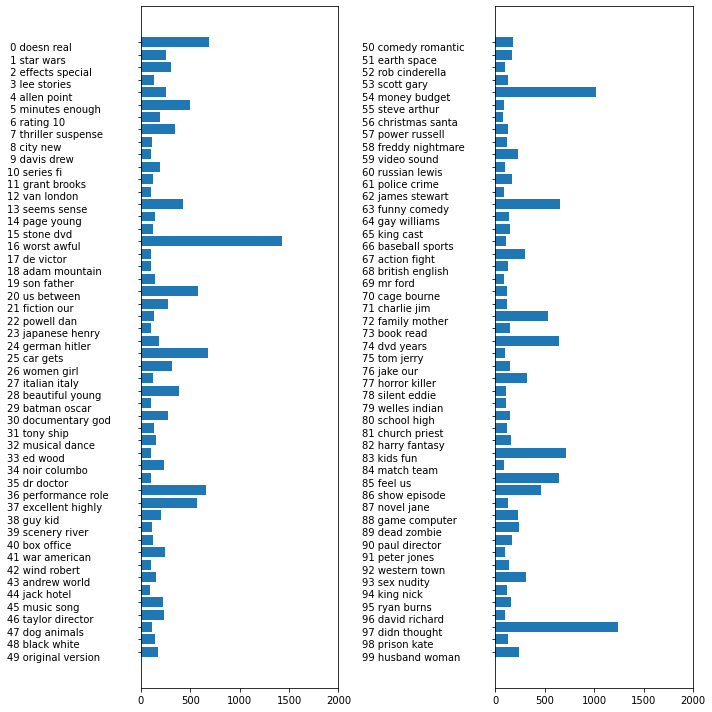

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ['{:>2} '.format(i) + ' '.join(words) for i, words
               in enumerate(feature_names[sorting[:, :2]])]
# 열이 두 개인 막대 그래프를 그립니다.
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()
plt.show()

중요도가 높은 토픽 중에 97번은 불용어에 가깝고 부정적 경향을 띄는 단어입니다. 토픽 16번은 완전 부정적이고, 그 다음은 장르에 관련된 토픽이 이어지며, 36번과 37번은 긍정적인 경향을 띄는 단어입니다.

LDA가 장르와 점수라는 두 종류의 큰 토픽과 어디에도 속하지 않는 토픽 몇 개를 더 찾아냈습니다. 리뷰 대부분은 특정 영화에 대한 의견이거나 평가 점수를 합리화하고 강조하기 위한 댓글입니다.

LDA와 같은 토픽 모델은 레이블이 없거나, 여기서처럼 레이블이 있더라도 큰 규모의 텍스트 말뭉치를 해석하는 데 좋은 방법입니다. LDA는 확률적 알고리즘이기 때문에 `random_state` 매개변수를 바꾸면 결과가 많이 달라집니다. 토픽을 구별하는 게 도움이 되더라도 비지도 학습에서 내린 결론은 보수적으로 평가해야 하므로 각 토픽에 해당하는 문서를 직접 보고 직관을 검증하는 게 좋습니다. `LDA.transform` 메서드에서 만든 토픽이 지도 학습을 위한 압축된 표현으로 사용될 수도 있습니다. 훈련 샘플이 적을 때 특히 유용합니다. 훈련 데이터가 적고 특성 수가 많을 때 과대적합 되기 쉬우므로, 특성 수를 줄이는 데 LDA를 사용할 수 있습니다.

# **7.10 요약 및 정리**

더 깊은 내용은 [Natural Language Processing with Python(오라일리, 2009)](http://www.nltk.org/book/)에서 확인할 수 있습니다. 자연어 처리의 개요와 `ntlk` 파이썬 패키지를 소개합니다.

대표적인 참고 도서는 [Introduction to Information Retrieval(캐임브리지 대학교, 2008)](http://nlp.stanford.edu/IR-book/)입니다. 정보 추출, 자연어 처리, 머신러닝에 대한 기초적인 알고리즘을 설명합니다. 

더 고수준의 텍스트 처리를 하려면 `spacy`(최근에 나왔으며 효율적이고 잘 설계된 패키지), `nltk`(잘 구축되어 있고 기능이 풍부하지만 조금 오래된 라이브러리), `gensim`(토픽 모델링이 강점인 자연어 처리 패키지)를 추천합니다. 

최근에는 신경망과 관련된 몇 가지 연구가 텍스트 처리 분야에서 두각을 보입니다. 하나는 `word2vec` 라이브러리에 구현된 **단어 벡터(word vector)** 또는 **분산 단어 표현(distributed word representations)**이라는 연속적인 벡터 표현입니다. [Distributed Representations of Words and Phrases and Their Compositionality](https://goo.gl/V3mTpj)라는 논문에서 이 주제를 소개합니다. `spacy`와 `gensim`이 이 논문에 실린 기법과 후속 기술들을 제공합니다.

자연어 처리에서 빠르게 성장하는 또 다른 분야는 텍스트 처리에 **순환 신경망(recurrent neural networks, RNN)**을 적용하는 것입니다. RNN은 신경망의 한 종류입니다. 클래스 레이블을 할당하는 분류 모델과 달리 텍스트를 출력할 수 있습니다. 텍스트 출력을 만들 수 있으므로 자동 번역이나 자동 요약에 RNN은 적합합니다. [Sequence to Sequence Learning with Neural Networks](https://goo.gl/1YNWlg)라는 논문에 해당되는 내용이 기술되어 있습니다. 텐서플로 프레임워크를 사용한 예제는 [텐서플로 웹사이트](https://www.tensorflow.org/tutorials/seq2seq)에서 확인할 수 있습니다. 아울러 본서를 번역하신 박해선님의 혼자 공부하는 머신러닝 + 딥러닝(한빛미디어, 2020)에서도 해당 내용을 확인할 수 있습니다.